In [2]:
import pandas as pd

df_test = pd.read_csv("/content/DailyDelhiClimateTest.csv")
df_train = pd.read_csv("/content/DailyDelhiClimateTrain.csv")
df_history = pd.read_csv("/content/weatherHistory.csv")

Below I converted all of the date columns to datetime

In [3]:
df_test['date'] = pd.to_datetime(df_test['date'])
df_train['date'] = pd.to_datetime(df_train['date'])
df_history['Formatted Date'] = pd.to_datetime(df_history['Formatted Date'])

<ipython-input-3-cf2ad021d634>:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_history['Formatted Date'] = pd.to_datetime(df_history['Formatted Date'])


Below I replaced the null values from the Precip Type column with the most frequent category used

In [4]:
mode_value = df_history['Precip Type'].mode()[0]

df_history['Precip Type'].fillna(value=mode_value, inplace=True)

df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               96453 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
df_history.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


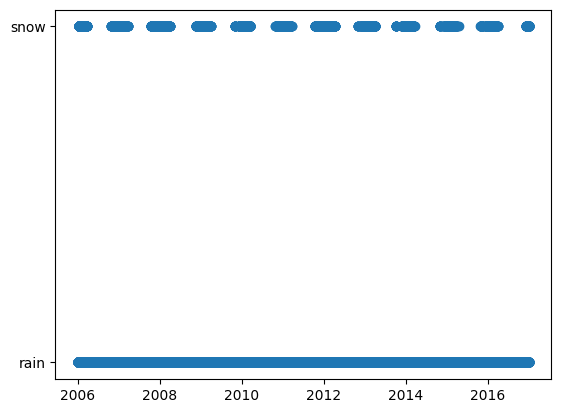

In [7]:
import matplotlib.pyplot as plt

x = df_history['Formatted Date']
y = df_history['Precip Type']

plt.scatter(x, y)
plt.show()

In [14]:
df_history['Temperature_Rolling_Mean'] = df_history['Temperature (C)'].rolling(window=5).mean()
df_history.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Temperature_Rolling_Mean
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,NaN
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,NaN
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,NaN
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,NaN
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,9.050000
5,2006-04-01 05:00:00+02:00,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.,9.000000
6,2006-04-01 06:00:00+02:00,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.,8.675556
7,2006-04-01 07:00:00+02:00,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.,8.554444
8,2006-04-01 08:00:00+02:00,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.,9.061111
9,2006-04-01 09:00:00+02:00,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.,10.064444


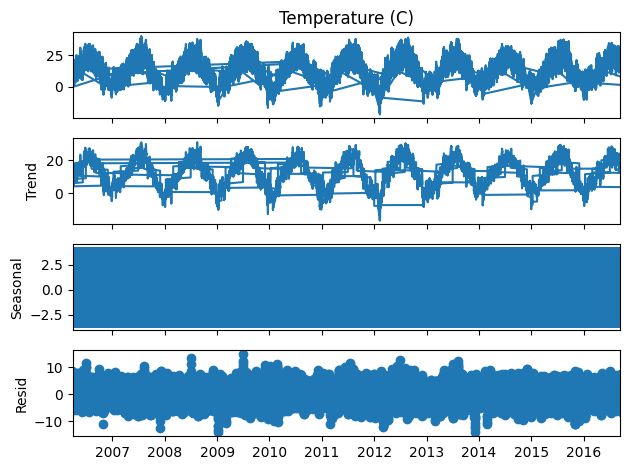

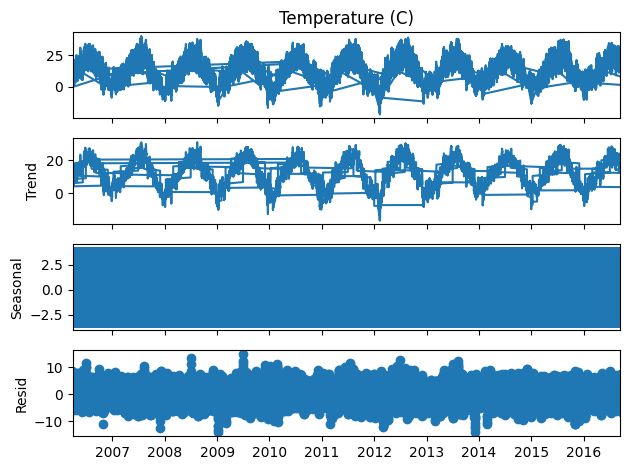

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_history['Formatted Date'] = pd.to_datetime(df_history['Formatted Date'], utc=True)

# Set date as the index
df_history.set_index('Formatted Date', inplace=True)

# Perform seasonal decomposition
result = seasonal_decompose(df_history['Temperature (C)'], model='additive', period=24) # Assuming daily periodicity

# Plot the decomposition
result.plot()

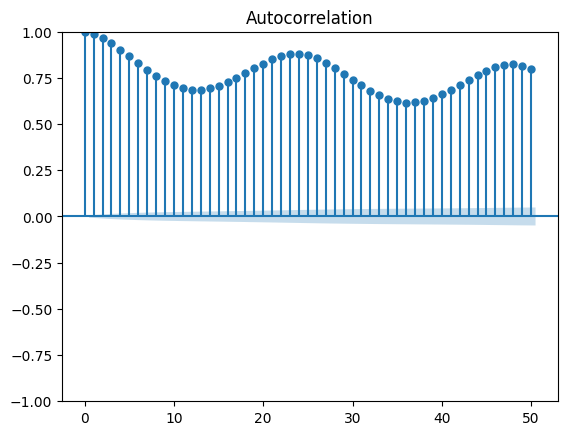

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Autocorrelation for temperature
plot_acf(df_history['Temperature (C)'], lags=50)
plt.show()

In [18]:
from statsmodels.tsa.arima.model import ARIMA

In [19]:
# Define the model (p, d, q)
model = ARIMA(df_history['Temperature (C)'], order=(1, 1, 1))  # Example with p=1, d=1, q=1

# Fit the ARIMA model
model_fit = model.fit()

# Print summary of the model's performance
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:        Temperature (C)   No. Observations:                96453
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -173218.728
Date:                Sat, 07 Sep 2024   AIC                         346443.456
Time:                        09:47:11   BIC                         346471.887
Sample:                             0   HQIC                        346452.098
                              - 96453                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7026      0.005    128.150      0.000       0.692       0.713
ma.L1         -0.4360      0.006    -74.625      0.000      -0.447      -0.425
sigma2         2.1253      0.003    738.670      0.0

In [20]:
# Forecast future values
forecast = model_fit.forecast(steps=10)
print(forecast)

96453    19.893876
96454    19.510965
96455    19.241944
96456    19.052938
96457    18.920147
96458    18.826853
96459    18.761307
96460    18.715256
96461    18.682902
96462    18.660172
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


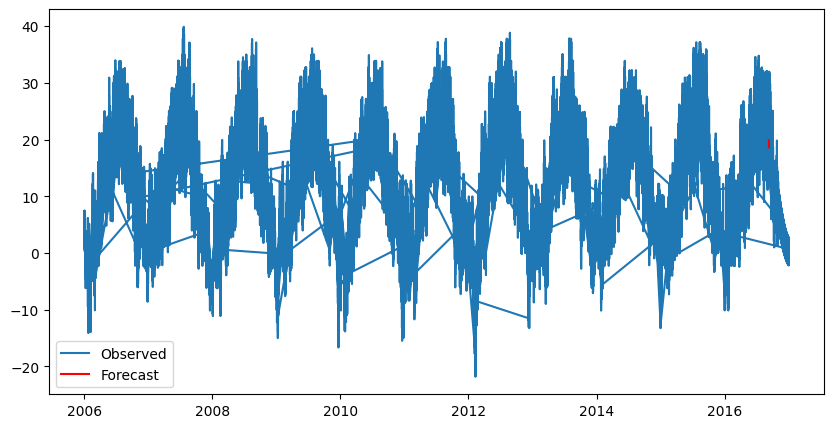

In [21]:
# Plot historical data and forecast
plt.figure(figsize=(10, 5))
plt.plot(df_history.index, df_history['Temperature (C)'], label='Observed')
plt.plot(pd.date_range(df_history.index[-1], periods=10, freq='H'), forecast, label='Forecast', color='red')
plt.legend()
plt.show()

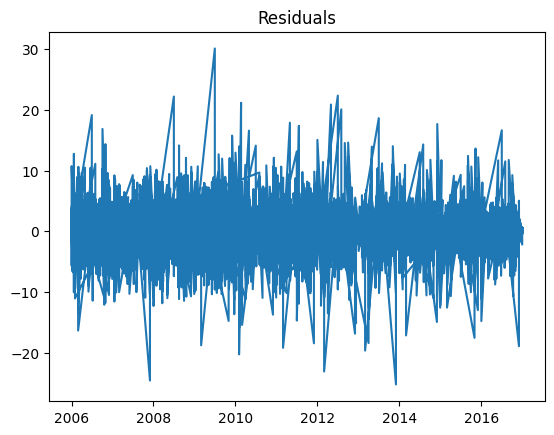

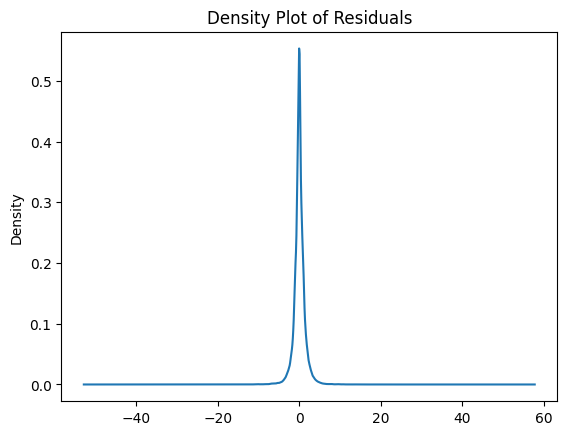

In [22]:
# Plot residuals to check for errors
residuals = model_fit.resid
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# Check for normality of residuals
residuals.plot(kind='kde')
plt.title('Density Plot of Residuals')
plt.show()